In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ergodicpy as ep
import scipy as sp

SAVE_FIGURES = False
x_points = 50

In [16]:
def bin_scan(obs=2000, x=20, bin_count=20, power=3, log=False):
    data = []
    for mix in np.linspace(0,1,x):
        nbsetup.cp(mix)
        for b in ep.bini(2,int(obs/5),bin_count,log=log):
            observations = np.array([
                np.random.uniform(size=int(2*obs)),
                np.concatenate([np.random.uniform(size=int(obs*(1-mix))), np.random.power(power,size=int(obs*mix))]),
            ])
            bins = np.linspace(0,1,b+1)
            ee = ep.ErgodicEnsemble(observations, bins)
            #ee.plot()
            ee.complexity
            data.append({
                'complexity': ee.complexity,
                'b': b,
                'mix': mix,
            })
    df = pd.DataFrame(data=data)
    plot_bin_scan(df)
    comp = df.groupby('mix').mean()['complexity']
    minner = df.groupby('mix').min()['complexity']
    print('diffs', (comp[1]-comp[0])/(minner[1]-minner[0]))
    return df

def plot_bin_scan(df):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    sns.lineplot(data=df, x='mix', y='complexity', hue='b', ax=axes[0])
    sns.lineplot(data=df.groupby(['mix']).mean().reset_index(), x='mix', y='complexity', ax=axes[0], color='cyan')
    sns.lineplot(data=df[df['mix']==0], x='b', y='complexity', ax=axes[1])
    sns.lineplot(data=df[df['mix']==1], x='b', y='complexity', ax=axes[2])

1.0
diffs 1.0751734407585987


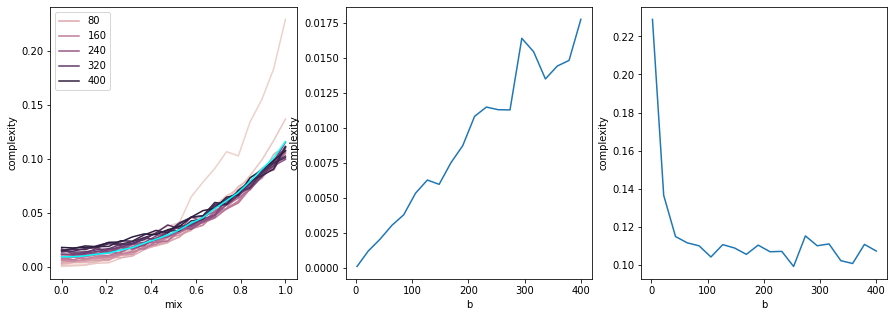

In [17]:
df = bin_scan(2000)

1.0
diffs 1.1576159068046121


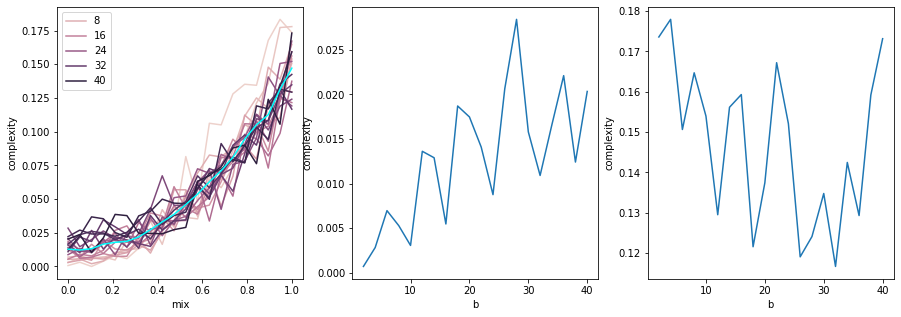

In [18]:
df = bin_scan(200)

1.0
diffs 1.0108576867137955


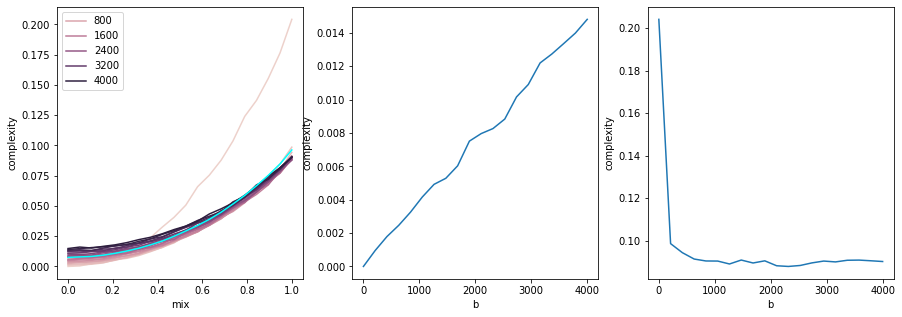

In [19]:
df = bin_scan(20000)

1.0
diffs 1.0698871874213514


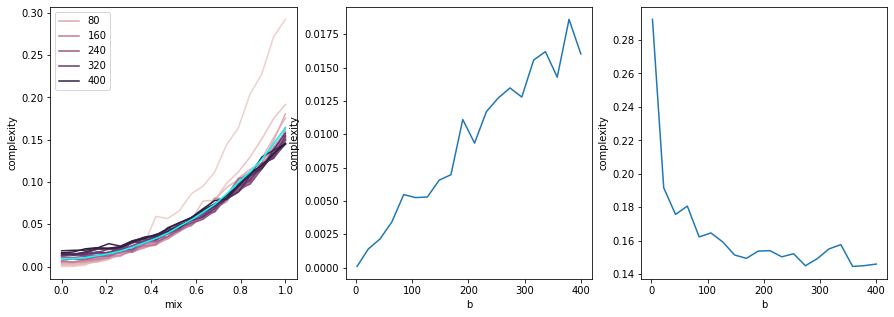

In [20]:
df = bin_scan(2000, power=4)

1.0
diffs 1.044321875282385


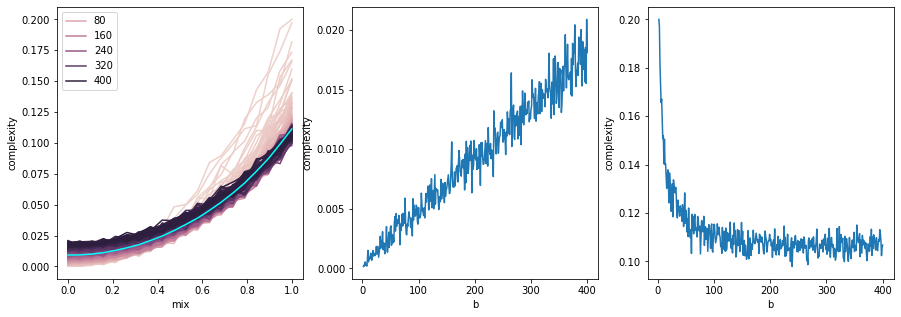

In [21]:
df = bin_scan(2000, power=3, bin_count=None)

1.0
diffs 1.32307380835898


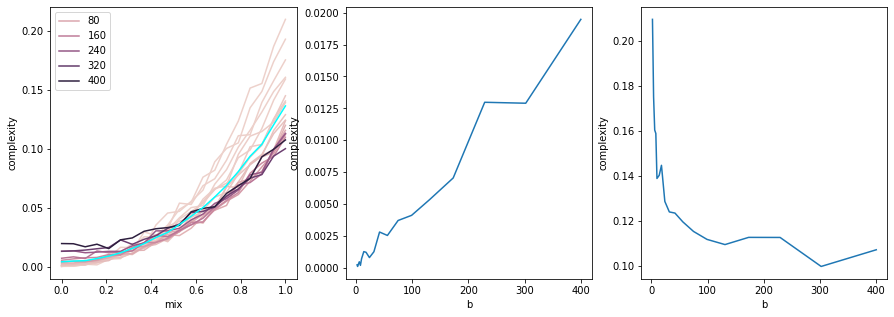

In [22]:
df = bin_scan(2000, power=3, bin_count=2000*0.01, log=True)